In [18]:
data = [(2, 96684422), (4, 96767781), (6, 96760818), (8, 96694682), (10, 96684321), (12, 96809939), (14, 96835986), (16, 96711760), (18, 96763567), (20, 96684234), (22, 96764812), (24, 92767258), (26, 92713812), (28, 92706904), (30, 92784080), (32, 92685222), (48, 92747737), (64, 92632542), (128, 64873490), (256, 38206225), (512, 21131384), (1024, 11531901)]

[195312500.0, 97656250.0, 48828125.0, 24414062.5, 12207031.25]


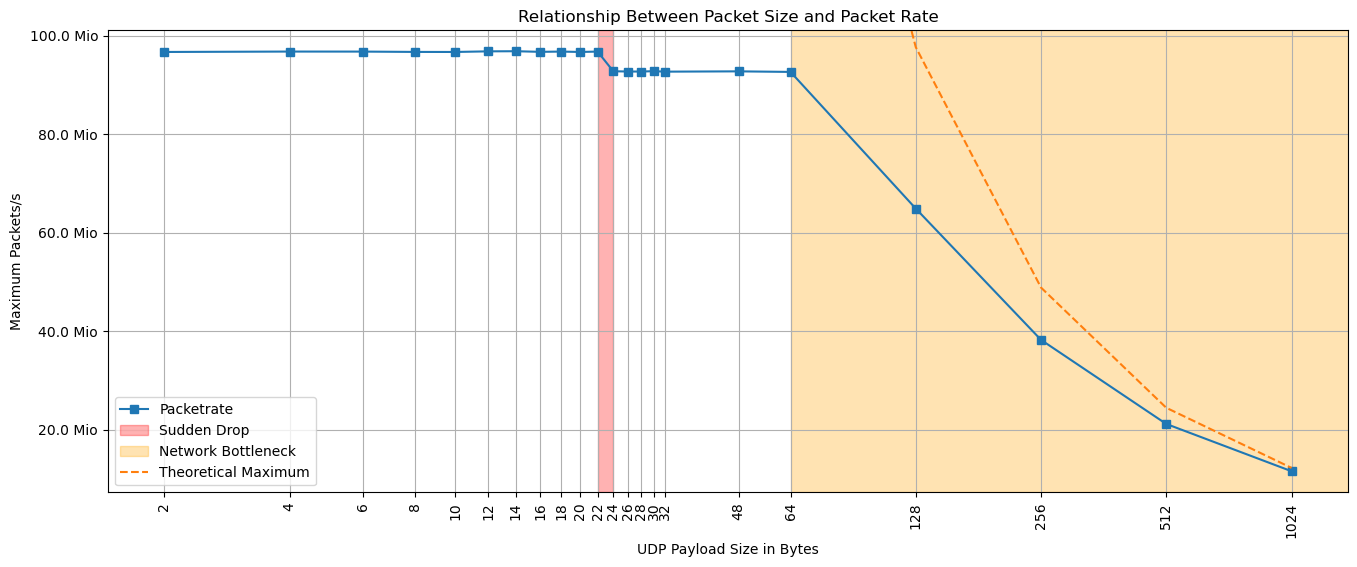

In [24]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

p_size = []
pps = []

def million_formatter(x, pos):
    return f'{x/1_000_000:.1f} Mio'


for m in data:
    p_size.append(m[0])
    pps.append(m[1])

theoretical = [(100_000_000_000/8)/ps for ps in p_size[17:]]
print(theoretical)

plt.figure(figsize=(16, 6))
plt.plot(p_size, pps, "-s", label="Packetrate")
plt.title("Relationship Between Packet Size and Packet Rate")
plt.xlabel("UDP Payload Size in Bytes")
plt.ylabel("Maximum Packets/s")
plt.xscale('log', base=2)
plt.xticks(p_size, [str(val) for val in p_size], rotation=90)
#plt.yticks(pps, [str(val) for val in pps])
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((6, 9))
#plt.gca().yaxis.set_major_formatter(formatter)
#plt.ticklabel_format(axis='y', style='sci')

plt.gca().yaxis.set_major_formatter(FuncFormatter(million_formatter))
plt.axvspan(22, 24, color='red', alpha=0.3, label='Sudden Drop')
plt.axvspan(64, 2048, color='orange', alpha=0.3, label='Network Bottleneck')
plt.autoscale(False)
plt.plot(p_size[17:], theoretical, "--", label="Theoretical Maximum")

plt.legend()
plt.grid(True)

plt.show()